# Sign Language Classification
### Task 4
### SYNC Machine Learning Internship
##### Abeera Malakar

In [1]:
! pip install -q kaggle

In [2]:
# Acessing direct dataset from kaggle

!rm -r ~/.kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

rm: cannot remove '/root/.kaggle': No such file or directory


In [3]:
!kaggle datasets download -d ahmedkhanak1995/sign-language-gesture-images-dataset

 91% 173M/191M [00:01<00:00, 184MB/s]
100% 191M/191M [00:01<00:00, 148MB/s]


In [4]:
# unzipping

import zipfile
ref=zipfile.ZipFile('/content/sign-language-gesture-images-dataset.zip','r')
ref.extractall('/content')
ref.close()

In [5]:
# importing librareis for CNN

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [6]:
# generators :- Huge ammount of data k batches e vaag kore

df=keras.utils.image_dataset_from_directory(
    directory='/content/Gesture Image Data', #data path
    labels='inferred', #binary mode e porbe
    label_mode='int', # sobkota label k integer value debe
    batch_size=100,
    image_size=(256,256)
)

Found 55500 files belonging to 37 classes.


##### how the images are present

In [7]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np
import pandas as pd

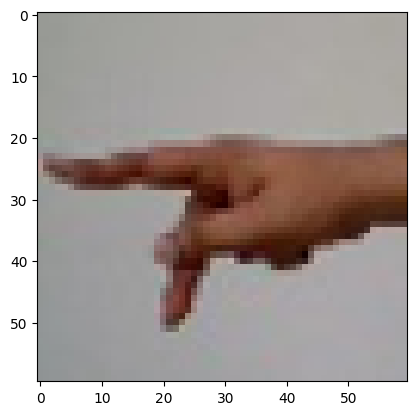

In [8]:
x="/content/Gesture Image Data/P/1005.jpg"
img=Image.open(x)
img = img.resize((60, 60))
sr = np.array(img) 
plt.imshow(img)
plt.show()

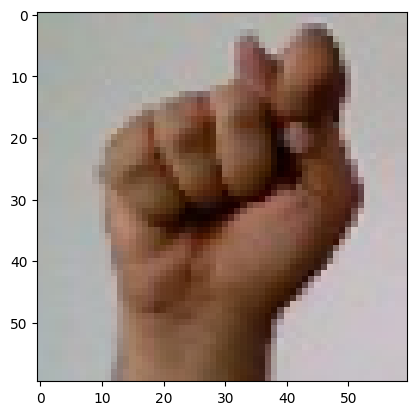

In [9]:
x="/content/Gesture Image Data/T/1001.jpg"
img=Image.open(x)
img = img.resize((60, 60))
sr = np.array(img) 
plt.imshow(img)
plt.show()

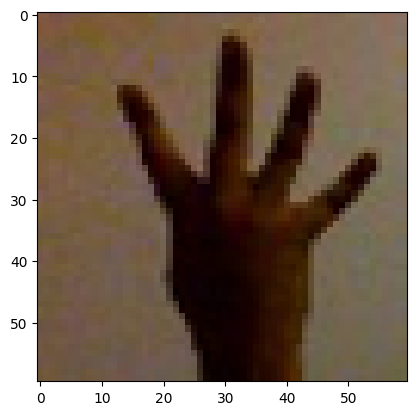

In [10]:
x="/content/Gesture Image Data/4/1000.jpg"
img=Image.open(x)
img = img.resize((60, 60))
sr = np.array(img) 
plt.imshow(img)
plt.show()

In [11]:
# Displaying the Classes

classes=['0','1','2','3','4','5','6','7','8','9',
         'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q',
         'R','S','T','U','V','W','X','Y','Z']

In [12]:
 # Normalization :- Image Value ta (256,256) e ache otake (0-1) range e ante hbe

from keras.preprocessing import image
# path set korchi
train_path = "/content/Gesture Image Data"
# image generation object
data=image.ImageDataGenerator(rescale=1./255)
#dataset normalization
x=data.flow_from_directory(train_path, 
                           target_size = (26,26),
                           batch_size = 32, 
                           class_mode = 'categorical')

Found 55500 images belonging to 37 classes.


In [13]:
import os

In [14]:
# Storing The Data and the Labels

data = []
labels = []
for i in classes:
    path = os.path.join(train_path,str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image=Image.open(path + '/' + a)
            image=image.resize((30,30))
            image=np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("error loading image.")
data = np.array(data)
labels = np.array(labels)
print(data.shape)
print(labels.shape)

(54000, 30, 30, 3)
(54000,)


In [15]:
# splitting the training and testing data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=50)

In [16]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(43200, 30, 30, 3) (10800, 30, 30, 3) (43200,) (10800,)


In [17]:
y_train

array(['X', 'T', 'K', ..., 'S', 'P', '9'], dtype='<U1')

In [18]:
# Lets Convert the labels to categorical

from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder # first amader oi string type category guloke int e ante hobe 
label_encoder = LabelEncoder()
y_train=np.array(y_train)
y_test=np.array(y_test)
y_train=label_encoder.fit_transform(y_train)
y_test=label_encoder.fit_transform(y_test)

In [19]:
y_train=to_categorical(y_train,num_classes=37)
y_test=to_categorical(y_test,num_classes=37)

Building the CNN

In [20]:
model= Sequential()

#Layer1: 32 Filters
model.add(Conv2D(32,kernel_size=(5,5),padding='valid',activation='relu',input_shape=x_train.shape[1:])) # convolution layer
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid')) #pooling layer
model.add(Dropout(rate=0.25)) # dropout layer
#Layer2: 64 Filters
model.add(Conv2D(64,kernel_size=(5,5),padding='valid',activation='relu')) 
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(rate=0.25))

#Flatten Layer
model.add(Flatten())

#Now we will add 1 fully connected layers
model.add(Dense(256,activation='relu'))

#Final Dropout Layer
model.add(Dropout(rate=0.5))

#Final Dense layer with 37 as Output is 37 Class
model.add(Dense(37, activation='softmax'))

In [21]:
#Summary of the Model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 4, 4, 64)          0

In [22]:
#compiling the model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# fitting
history=model.fit(x_train,y_train,batch_size=32,epochs=25,validation_data=(x_test, y_test))

Epoch 1/25
1350/1350 [==============================] - 18s 5ms/step - loss: 1.0394 - accuracy: 0.7953 - val_loss: 0.0083 - val_accuracy: 0.9986
Epoch 2/25
1350/1350 [==============================] - 6s 5ms/step - loss: 0.1341 - accuracy: 0.9617 - val_loss: 0.0060 - val_accuracy: 0.9990
Epoch 3/25
1350/1350 [==============================] - 7s 5ms/step - loss: 0.1412 - accuracy: 0.9659 - val_loss: 0.0094 - val_accuracy: 0.9974
Epoch 4/25
1350/1350 [==============================] - 7s 6ms/step - loss: 0.1260 - accuracy: 0.9748 - val_loss: 0.0011 - val_accuracy: 0.9997
Epoch 5/25
1350/1350 [==============================] - 10s 7ms/step - loss: 0.1201 - accuracy: 0.9774 - val_loss: 0.0024 - val_accuracy: 0.9992
Epoch 6/25
1350/1350 [==============================] - 9s 7ms/step - loss: 0.1301 - accuracy: 0.9782 - val_loss: 3.7804e-04 - val_accuracy: 0.9999
Epoch 7/25
1350/1350 [==============================] - 7s 5ms/step - loss: 0.1824 - accuracy: 0.9725 - val_loss: 0.0049 - val_acc

In [24]:
# accuracy of the model

score = model.evaluate(x_test,y_test,verbose = 0)
print('test accuracy: ', score[1]*100,'%')

test accuracy:  100.0 %


To check How Our Model Working

In [25]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def check(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    x=np.array(data)
    y=np.argmax(model.predict(x),axis=1)
    return image,y

1/1 [==============================] - 0s 167ms/step
Predicted sign is:  P


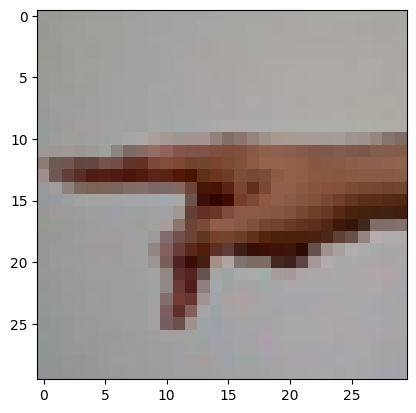

In [26]:
plot,prediction=check(r'/content/Gesture Image Data/P/1001.jpg') # ans is P
s=[str(i)for i in prediction] 
a="".join(s)
a=int(a)
print("Predicted sign is: ", classes[a])
plt.imshow(plot)
plt.show()

1/1 [==============================] - 0s 22ms/step
Predicted sign is:  B


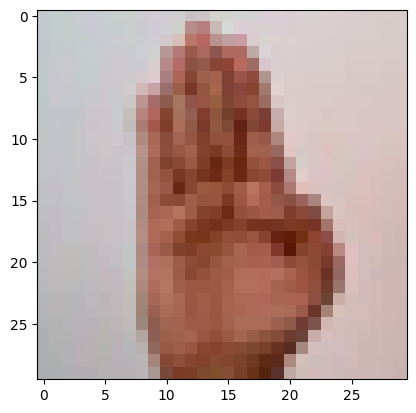

In [27]:
plot,prediction=check(r'/content/Gesture Image Data/B/1000.jpg') # ans is B
s=[str(i)for i in prediction] 
a="".join(s)
a=int(a)
print("Predicted sign is: ", classes[a])
plt.imshow(plot)
plt.show()

1/1 [==============================] - 0s 19ms/step
Predicted sign is:  1


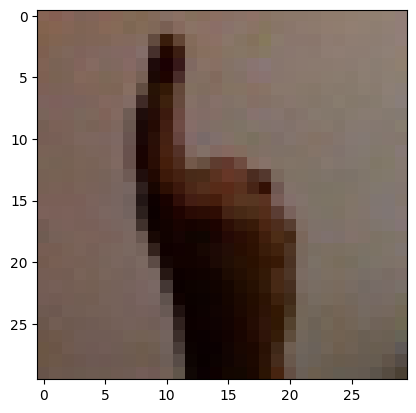

In [28]:
plot,prediction=check(r'/content/Gesture Image Data/1/1005.jpg') # ans is 1
s=[str(i)for i in prediction] 
a="".join(s)
a=int(a)
print("Predicted sign is: ", classes[a])
plt.imshow(plot)
plt.show()

1/1 [==============================] - 0s 19ms/step
Predicted sign is:  7


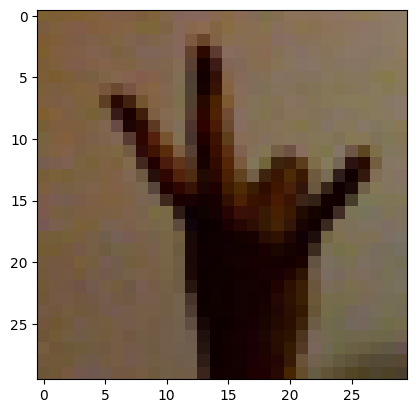

In [29]:
plot,prediction=check(r'/content/Gesture Image Data/7/1011.jpg') # ans is 7
s=[str(i)for i in prediction] 
a="".join(s)
a=int(a)
print("Predicted sign is: ", classes[a])
plt.imshow(plot)
plt.show()

Model Saving

In [30]:
import pickle
pickle.dump(model,open('sign.pkl','wb'))

In [31]:
model.save('model.h5')